In [113]:
import numpy as np
import cmath as cm
import matplotlib.pyplot as plt
from scipy import optimize

# Вариант № 9
## Задание 2.1.9

**Даны два уравнения 
$$f(x) = \log(x)^2 - \frac{3}{4}\log(x) + \frac{1}{8} = 0$$ и 
$$g(x) = \log(x)^2 - \log(x) + \frac{1}{4} = 0.$$ Найти с точностью $eps = 10^{-10}$ корни уравнений,
содержащиеся на отрезке $[a, b]$. Для решения задачи использовать метод бисекции. Найти корни с помощью
встроенной функции root.**

In [2]:
def f(x):
    return((np.log(x))**2 - 3/4*(np.log(x)) +1/8)
def g(x):
    return((np.log(x))**2 - (np.log(x)) +1/4)

**Локализуем корни уравнений.**

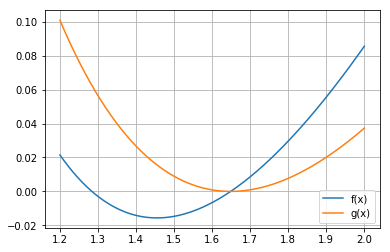

In [3]:
t = np.arange(1.2,2, 0.0001)
y = f(t)
z = g(t)
plt.plot(t,y, label = 'f(x)')
plt.plot(t,z, label = 'g(x)')
plt.legend()
plt.grid(True)

**Из графиков видно, что $f(x)$ имеет два корня, один из которых лежит в интервале $[1.2,1.3]$, a другой в интервале $[1.6,1.7]$. Функция $g(x)$ имеет один корень (т.к. является полным квадратом))**

In [4]:
def bisection(p, a, b, eps, maxiter = 1000):
    A = a
    B = b
    k = 0
    while((B - A)/2 > eps):
        C = (A + B)/2
        if(p(A)*p(C) < 0):
            B = C
        else:
            A = C
        k += 1
        if( k == maxiter):
            break
    return(C)
            

In [5]:
print('Первый корень f(x) = 0: x = %.10f' %bisection(f, 1.2, 1.4, 10**(-10)))
print('Второй корень f(x) = 0: x = %.10f' %bisection(f, 1.6, 1.7,10**(-10)))
print('Корень g(x) = 0: x = %.10f' %bisection(g, 1.6, 1.7,10**(-10)))

Первый корень f(x) = 0: x = 1.2840254167
Второй корень f(x) = 0: x = 1.6487212708
Корень g(x) = 0: x = 1.6999999998


**Для функции $g(x)$ метод бисекции дает неверный результат. Действительно, функцию $g(x)$ можем представить в виде: $$g(x) = (\log(x) - \frac{1}{2})^2,$$ а один из корней $f(x) = 0$ определяется выражением $$\log(x) = \frac{1}{2},$$ т.е. должен совпадать с корнем $g(x)$. Ошибка обусловлена тем, что $g(x) \geq 0 \quad \forall x $. В этом случае метод бисекции неприменим.**

**Проверка:**

In [6]:
print('Первый корень f(x) = 0: x = %.10f' %optimize.bisect(f, 1.2,1.3))
print('Второй корень f(x) = 0: x = %.10f' %optimize.bisect(f, 1.6,1.7))

Первый корень f(x) = 0: x = 1.2840254167
Второй корень f(x) = 0: x = 1.6487212707


## Задание 2.4.2

**Локализовать корни уравнения $$p(x) = x^5 - 2.656764x^4 - 3.406111x^3 + 10.89372x^2 - 1.752935x - 3.423612.
$$ Найти их с точностью $eps = 10^{-8},$ используя методы простой
итерации и Ньютона. Сравнить скорость сходимости методов (по числу итераций).**

In [7]:
def p(x):
    return(x**5 - 2.656764*x**4 - 3.406111*x**3 + 10.89372*x**2 - 1.752935*x - 3.423612)
def der_p(x):
    return(5*x**4 - 4*2.656764*x**3 - 3*3.406111*x**2 + 2*10.89372*x - 1.752935)

**Локализуем корни уравнения.**

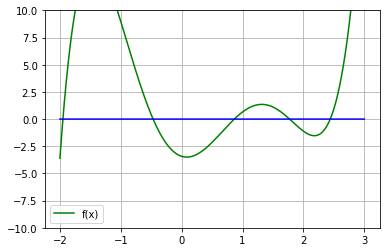

In [63]:
t = np.arange(-2,3, 0.0001)
y = p(t)
plt.plot(t,y, color = 'g', label = 'f(x)')
plt.plot(t, np.zeros(len(t)), color = 'b')
plt.ylim(-10,10)
plt.legend()
plt.grid(True)

$ x_{1} \in [-2, -1.5], x_{2} \in [-0.7, 0.3] , x_{3} \in [0.5, 1], x_{4} \in [1.5, 2], x_{5} \in [2.3, 2.6]$

**График производной:**

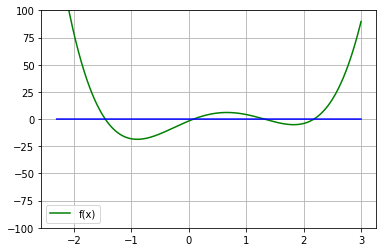

In [64]:
t = np.arange(-2.3,3, 0.0001)
z = der_p(t)
plt.plot(t,z, label = 'f(x)', color = 'g')
plt.plot(t, np.zeros(len(t)), color = 'b')
plt.ylim(-100,100)
plt.legend()
plt.grid(True)

In [76]:
def plot_phi(a,b):
    t = np.arange(a,b, 0.0001)
    alpha = np.arange(0.01, 0.1, 0.01)
    for i in alpha:
        plt.plot(t,1 - i * der_p(t))
    plt.plot(t, np.zeros(len(t)), color = 'b')
    plt.ylim(-3,3)
    plt.grid(True)

In [82]:
def f_p_iteration(f, x0, m, M, eps, maxiter = 10000):
    x_n = x0
    k = 0
    q = (M - m)/(M + m)
    alpha = 2/(M + m)
    while(True):
        x_n1 = x_n - alpha*f(x_n)
        if(abs(x_n1 - x_n) < (1-q)/q * eps):
            break
        x_n = x_n1
        k += 1
        if(k == maxiter):
            break
    return(x_n,k)

def newton_f(x):
    return x - p(x)/der_p(x)

def newton(newton_f,x0, eps, maxiter = 10000):
    x_n = x0
    k = 0
    while True:
        x_n1 = newton_f(x_n)
        k += 1
        if(k == maxiter):
            break
        if abs(x_n1 - x_n) < eps:
            break
        x_n = x_n1
    return(x_n, k)

** Найдём корни $x_{1} ,x_{2}, x_{3}$. Определим верхние и нижние грани производной $p(x)$ на интервалах локализации соответствующих корней изходя из графика.**

In [104]:
M1, m1 = 80, 3
M2, m2 = 18, 8
M3, m3 = 10, 4
M4, m4 = 10, 1.5
M5, m5 = 80, 0.1

In [96]:
print('Первый корень p(x) = 0 (метод простой итерации): x = %.6f' 
      %f_p_iteration(p, -1.7, m1, M1, 10**(-6))[0])
print('количество итераций:',f_p_iteration(p, -1.7, m1, M1, 10**(-6))[1])
print('Первый корень p(x) = 0 (метод Ньютона): x = %.6f' 
      %newton(newton_f, -1.7, 10**(-6))[0])
print('количество итераций:',newton(newton_f, 2.3, 10**(-6))[1])

Первый корень p(x) = 0 (метод простой итерации): x = -1.950949
количество итераций: 31
Первый корень p(x) = 0 (метод Ньютона): x = -1.950949
количество итераций: 6


In [101]:
print('Третий корень p(x) = 0 (метод простой итерации): x = %.6f' 
      %f_p_iteration(p, 0.3, m3, M3, 10**(-6))[0])
print('количество итераций:',f_p_iteration(p, 0.3, m3, M3, 10**(-6))[1])
print('Третий корень p(x) = 0 (метод Ньютона): x = %.6f' 
      %newton(newton_f, 0.3, 10**(-6))[0])
print('количество итераций:',newton(newton_f, 0.3, 10**(-6))[1])

Третий корень p(x) = 0 (метод простой итерации): x = 0.864354
количество итераций: 9
Третий корень p(x) = 0 (метод Ньютона): x = 0.864355
количество итераций: 6


In [102]:
print('Пятый корень p(x) = 0 (метод простой итерации): x = %.6f' 
      %f_p_iteration(p, 2.3, m5, M5, 10**(-6))[0])
print('количество итераций:',f_p_iteration(p, 2.3, m5, M5, 10**(-6))[1])
print('Пятый корень p(x) = 0 (метод Ньютона): x = %.6f' 
      %newton(newton_f, 2.3, 10**(-6))[0])
print('количество итераций:',newton(newton_f, 2.3, 10**(-6))[1])

Пятый корень p(x) = 0 (метод простой итерации): x = 2.440524
количество итераций: 43
Пятый корень p(x) = 0 (метод Ньютона): x = 2.440524
количество итераций: 6


**Видно, что метод Ньютона сходится быстрее (он имеет квадратичную сходимость, а метод простой итерации линейную).**

**Отдельно рассмотрим корни $x_{2}, x_{4}$**

In [105]:
print('Второй корень p(x) = 0 (метод простой итерации): x = %.6f' 
      %f_p_iteration(p, -0.3, m2, M2, 10**(-6))[0])
print('количество итераций:',f_p_iteration(p, -0.3, m2, M2, 10**(-6))[1])
print('Второй корень p(x) = 0 (метод Ньютона): x = %.6f' 
      %newton(newton_f, -0.3, 10**(-6))[0])
print('количество итераций:',newton(newton_f, -0.3, 10**(-6))[1])

Второй корень p(x) = 0 (метод простой итерации): x = 0.864351
количество итераций: 25
Второй корень p(x) = 0 (метод Ньютона): x = -0.469399
количество итераций: 5


In [107]:
print('Четвертый корень p(x) = 0 (метод простой итерации): x = %.6f' 
      %f_p_iteration(p, 1.3, m4, M4, 10**(-6))[0])
print('количество итераций:',f_p_iteration(p, 1.3, m4, M4, 10**(-6))[1])
print('Четвертый корень p(x) = 0 (метод Ньютона): x = %.6f' 
      %newton(newton_f, 1.6, 10**(-6))[0])
print('количество итераций:',newton(newton_f, 1.6, 10**(-6))[1])

Четвертый корень p(x) = 0 (метод простой итерации): x = 0.864355
количество итераций: 7
Четвертый корень p(x) = 0 (метод Ньютона): x = 1.772234
количество итераций: 4


**Видно, что метод простой итерации в этих случаях не дает правильного ответа. Посмотрим на графики функции $1 - \alpha p^{`}(x)$ на интервалах локализации этих корней.**

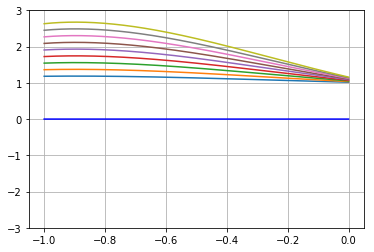

In [108]:
plot_phi(-1,0) ## для корня х_2

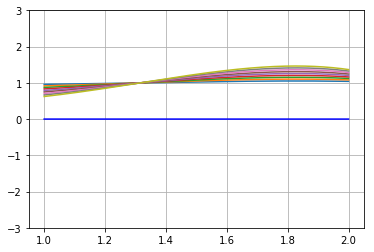

In [109]:
plot_phi(1,2) ## для корня х_4

**Ни при каких $\alpha$ модуль функции $1 - \alpha p^{`}(x)$ в искомых точках не будет меньше единицы, значит метод простой итерации не будет сходится.**

## Задание 2.8.3

**Найти приближенно все (в том числе комплексные) корни уравнения $$f(x) = x^4 - 2.7x^3 + x - 1 = 0 $$ с точностью $eps = 10^{-5},$
используя метод Ньютона.**

In [118]:
def z(x):
    return(x**4 - 2.7*x**3 + x - 1)
def der_z(x):
    return(4*x**3 - 3*2.7*x**2 + 1 )
def newton_f(x):
    return x - z(x)/der_z(x)

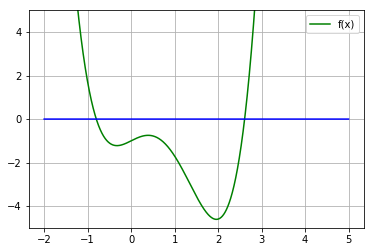

In [117]:
t = np.arange(-2,5, 0.001)
y = z(t)
plt.plot(t,y, color = 'g', label = 'f(x)')
plt.plot(t, np.zeros(len(t)), color = 'b')
plt.ylim(-5,5)
plt.legend()
plt.grid(True)

In [119]:
print('Первый корень p(x) = 0 (метод Ньютона): x = %.5f' 
      %newton(newton_f, -1, 10**(-5))[0])

Первый корень p(x) = 0 (метод Ньютона): x = -0.80128


In [120]:
print('Второй корень p(x) = 0 (метод Ньютона): x = %.5f' 
      %newton(newton_f, 2, 10**(-5))[0])

Второй корень p(x) = 0 (метод Ньютона): x = 2.60942


In [138]:
print('Первый комплексный корень p(x) = 0 (метод Ньютона): x = ' 
      , newton(newton_f, -1 + 1j, 10**(-5))[0])

Первый комплексный корень p(x) = 0 (метод Ньютона): x =  (0.4459275140154008+0.5285868060444323j)


In [130]:
print('Второй комплексный корень p(x) = 0 (метод Ньютона): x = ' 
      ,newton(newton_f, 2-1j, 10**(-5))[0])

Второй комплексный корень p(x) = 0 (метод Ньютона): x =  (0.445931051775355-0.5285958293659306j)


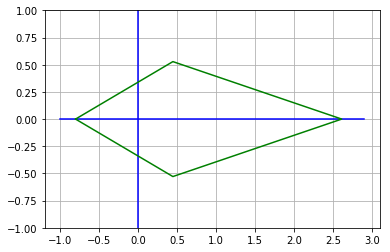

In [137]:
x = np.arange(-1,3,0.1)
t = [-0.80128, 0.44593, 2.60942 , 0.44593, -0.80128]
y = [0, 0.52859, 0, -0.52859, 0]
plt.plot(x, np.zeros(len(x)), color = 'b')
plt.plot(np.zeros(len(x)), x, color = 'b')
plt.plot(t,y, color = 'g')
plt.ylim(-1,1)
plt.grid(True)